<a href="https://colab.research.google.com/github/FilippoIspanico/ANNDL/blob/main/Classying_newswires_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Extracting and pre-preocessing data

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 1s 0us/step


In [ ]:
# prepering the data: one hot encoding

import numpy as np

# this function return a matrix of dimensions (# of sequences) * (dimension of a sequence)
# at the row i we have the i-th reviews.
# in position [i][j] we have a value that can be either 1 or 0. If this value is 1 it means that the j-th word of the dictionary is in the review. 0 otherwise.
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence]  = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


Just as the newswires also the labels must be vectorized, in particular what we will do is the following:



\
\begin{array}{c}
\underbrace{
\begin{bmatrix}
0 \\
0 \\
\vdots \\
0 \\
1 \\
0 \\
\vdots \\
0
\end{bmatrix}
}_{\text{football news}}
\end{array}


In [ ]:
# performing one hot encoding on the labels:

In [ ]:
from keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Building NN

In [ ]:
from keras import models, layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [ ]:
# compiling the model
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


### Training the NN

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 116ms/step - loss: 2.8113 - accuracy: 0.5046 - val_loss: 1.8550 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 1s 54ms/step - loss: 1.5361 - accuracy: 0.6907 - val_loss: 1.3642 - val_accuracy: 0.6890
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.1581 - accuracy: 0.7428 - val_loss: 1.1850 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.9462 - accuracy: 0.7955 - val_loss: 1.0603 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.7812 - accuracy: 0.8338 - val_loss: 1.0083 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6539 - accuracy: 0.8583 - val_loss: 0.9626 - val_accuracy: 0.7900
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5476 - accuracy: 0.8811 - val_loss: 0.9105 - val_accuracy: 0.8130
Epoch 8/20
1

### Plotting results

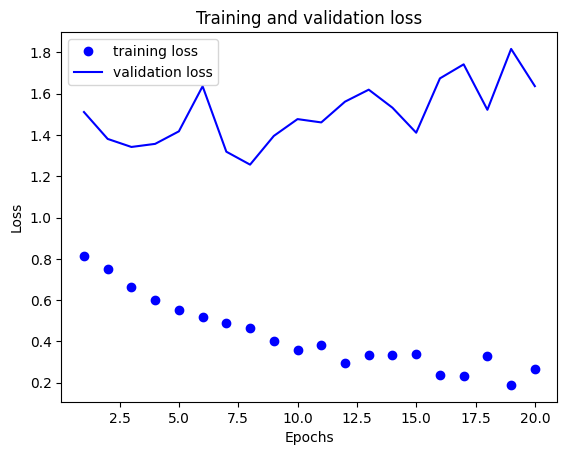

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

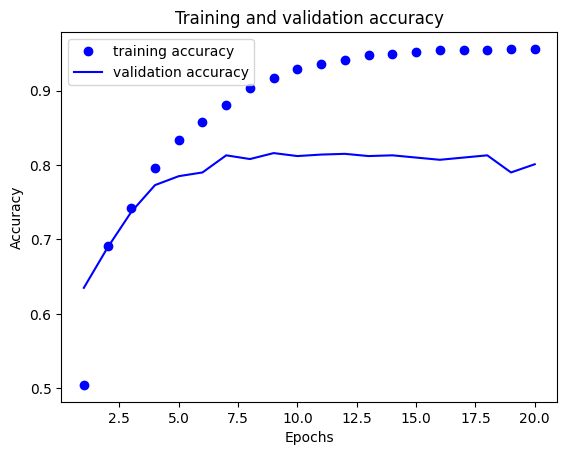

In [ ]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label = 'training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

We can observe that the model begins to overfit after 9 epochs, so we will train a new NN for 9 epochs

### Building & training a new NN

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
# compiling the model
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 2s 84ms/step - loss: 2.8016 - accuracy: 0.5018 - val_loss: 1.8549 - val_accuracy: 0.6240
Epoch 2/9
16/16 [==============================] - 1s 80ms/step - loss: 1.5404 - accuracy: 0.6882 - val_loss: 1.3727 - val_accuracy: 0.7100
Epoch 3/9
16/16 [==============================] - 1s 64ms/step - loss: 1.1734 - accuracy: 0.7502 - val_loss: 1.1937 - val_accuracy: 0.7370
Epoch 4/9
16/16 [==============================] - 1s 88ms/step - loss: 0.9650 - accuracy: 0.7924 - val_loss: 1.0922 - val_accuracy: 0.7590
Epoch 5/9
16/16 [==============================] - 1s 93ms/step - loss: 0.8097 - accuracy: 0.8242 - val_loss: 1.0107 - val_accuracy: 0.7750
Epoch 6/9
16/16 [==============================] - 1s 93ms/step - loss: 0.6760 - accuracy: 0.8512 - val_loss: 0.9600 - val_accuracy: 0.7850
Epoch 7/9
16/16 [==============================] - 1s 83ms/step - loss: 0.5699 - accuracy: 0.8775 - val_loss: 0.9191 - val_accuracy: 0.8010
Epoch 8/9
16/16 [===

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 6ms/step - loss: 0.9613 - accuracy: 0.7836


In [ ]:
prediction = model.predict(x_test)

### Experiments

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
# compiling the model
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 90ms/step - loss: 2.3912 - accuracy: 0.5430 - val_loss: 1.5737 - val_accuracy: 0.6490
Epoch 2/20
16/16 [==============================] - 1s 72ms/step - loss: 1.3260 - accuracy: 0.7093 - val_loss: 1.2439 - val_accuracy: 0.7330
Epoch 3/20
16/16 [==============================] - 1s 72ms/step - loss: 0.9964 - accuracy: 0.7838 - val_loss: 1.0893 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 1s 69ms/step - loss: 0.7913 - accuracy: 0.8249 - val_loss: 0.9872 - val_accuracy: 0.7890
Epoch 5/20
16/16 [==============================] - 2s 118ms/step - loss: 0.6248 - accuracy: 0.8685 - val_loss: 0.9326 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 2s 95ms/step - loss: 0.5140 - accuracy: 0.8915 - val_loss: 0.8883 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 1s 70ms/step - loss: 0.4051 - accuracy: 0.9164 - val_loss: 0.8697 - val_accuracy: 0.8270
Epoch 8/20
1

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 5ms/step - loss: 1.1042 - accuracy: 0.7858
